<h1 align="center">📊 TRỰC QUAN HOÁ DỮ LIỆU</h1>


<h1 align="center">📖 Mục lục</h1>

[I. Tiền xử lý bổ sung](#i)

[II.Phân tích vấn đề và trực quan](#ii)
- [1. Chủ đề 1: Phụ nữ và vấn đề với bệnh trầm cảm](#ii1)
- [2. Chủ đề 2: Lối sống ảnh hưởng đến sức khỏe tinh thần như thế nào?](#ii2)
    - [2.1: Cách thời gian ngủ tác động đến sức khỏe tinh thần](#ii2.1)

> ## I. Tiền xử lý bổ sung <a id="i"></a>

Import các thư viện hỗ trợ

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

Đọc dữ liệu đầu vào

In [2]:
data_folder_path="../../dataset/"

In [3]:
data=pd.read_csv(f"{data_folder_path}/processed_data.csv",sep=",",header=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27872 entries, 0 to 27871
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27872 non-null  int64  
 1   Gender                                 27872 non-null  object 
 2   Age                                    27872 non-null  int64  
 3   City                                   27872 non-null  object 
 4   Profession                             27872 non-null  object 
 5   Academic Pressure                      27872 non-null  int64  
 6   Work Pressure                          27872 non-null  int64  
 7   CGPA                                   27872 non-null  float64
 8   Study Satisfaction                     27872 non-null  int64  
 9   Job Satisfaction                       27872 non-null  int64  
 10  Sleep Duration                         27872 non-null  object 
 11  Di

> ## II. Phân tích vấn đề và trực quan <a id="ii"></a>

### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 1: Phụ nữ và vấn đề với bệnh trầm cảm.</span> <a id="ii1"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Trầm cảm là kết quả của sự tương tác phức tạp giữa nhiều yếu tố bao gồm yếu tố sinh học, tâm lý-xã hội, yếu tố môi trường... Theo đó phụ nữ là nhóm người chịu ảnh hưởng nặng nhất từ các yếu tố trên do sự thay đổi mạnh mẽ của nội tiết tố như hormon estrogen và progesterone trong các giai đoạn quan trọng của cuộc đời như dậy thì. Thêm vào đó phụ nữ cũng là nhóm đối tượng bị ảnh hưởng nặng nề bởi xã hội như kỳ vọng, lạm dụng, bất công - Theo [Vinmec](https://www.vinmec.com/vie/bai-viet/tram-cam-o-phu-nu-nhung-dieu-can-biet-vi).


* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Xác thực vấn đề này giúp mọi người trong xã hội có sự đối xử công bằng và hiểu rõ hơn về tình trạng sức khoẻ tinh thần của phụ nữ. Đồng thời giúp chỉnh bản thân những người phụ nữ có thể nắm rõ các yếu tố ảnh hưởng đến bản thân để có sự điều chỉnh hợp lý đối với cuộc sống bản thân.

* <span style="font-style:italic;">Trực quan hoá</span>

In [5]:

# Tổng số người theo giới tính
total_by_gender = data.groupby('Gender').size()
# Số người trầm cảm theo giới tính
depressed_by_gender = data[data['Depression']==1].groupby('Gender').size()
suicidal_thoughts_by_gender = data[(data['Have you ever had suicidal thoughts ?'] =='Yes')].groupby('Gender').size()
# Tính tỉ lệ phần trăm
depression_rate = (depressed_by_gender / total_by_gender) * 100
suicida_thoughts_rate= (suicidal_thoughts_by_gender / total_by_gender)*100
# Hiển thị
depression_rate

Gender
Female    58.452188
Male      58.633788
dtype: float64

In [6]:
suicida_thoughts_rate

Gender
Female    63.363047
Male      63.230749
dtype: float64

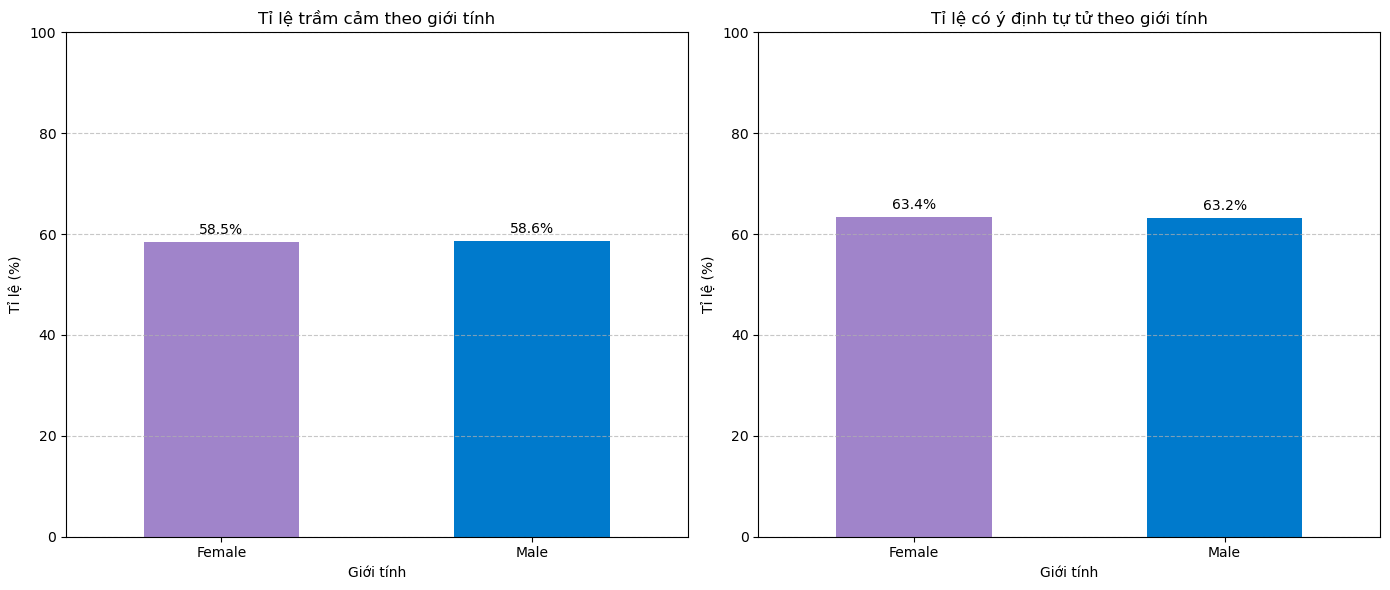

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ tỉ lệ trầm cảm theo giới tính
depression_rate.plot(kind='bar', color=['#A084CA', '#007ACC'], ax=axes[0])
axes[0].set_title('Tỉ lệ trầm cảm theo giới tính')
axes[0].set_ylabel('Tỉ lệ (%)')
axes[0].set_xlabel('Giới tính')
axes[0].set_xticks(range(len(depression_rate.index)))
axes[0].set_xticklabels(depression_rate.index, rotation=0)
axes[0].set_ylim(0, 100)
# Hiển thị giá trị trên đầu mỗi cột
for i, value in enumerate(depression_rate):
    axes[0].text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ tỉ lệ có ý định tự tử theo giới tính
suicida_thoughts_rate.plot(kind='bar', color=['#A084CA', '#007ACC'], ax=axes[1])
axes[1].set_title('Tỉ lệ có ý định tự tử theo giới tính')
axes[1].set_ylabel('Tỉ lệ (%)')
axes[1].set_xlabel('Giới tính')
axes[1].set_xticks(range(len(suicida_thoughts_rate.index)))
axes[1].set_xticklabels(suicida_thoughts_rate.index, rotation=0)
axes[1].set_ylim(0, 100)
for i, value in enumerate(suicida_thoughts_rate):
    axes[1].text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Gender`, `Depression`,`Have you ever had suicidal thoughts ?`
- Nội dung biểu đồ:
    * Biểu đồ so sánh hai vấn đề quan trọng của bệnh trầm cảm giữa hai nhóm đối tượng nam và nữ, sử dụng biểu đồ cột giúp dễ dàng thực hiện so sánh hơn.
    * Đối với vấn đề trầm cảm, biểu đồ cho thấy ở cả hai giới tính thì giới trẻ hiện nay có nguy cơ mắc bệnh trầm cảm đều ở mức cao và hầu như không có sự khác biệt đối với cả hai giới tính.
    * Đối với vấn đề "Đã từng có ý nghĩ đến việc tự sát", giá trị này thậm chí còn cao hơn so với nguy cơ mắc bệnh trầm cảm và không có sự khác biệt to lớn cả hai nhóm giới tính.

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt AI hỗ trợ phân tích**: quan sát biều đồ, không cần nhận xét biểu đồ. Với thông tin thực tế rằng tỉ lệ mắc bệnh trầm cảm ở nữ cao gấp đôi so với nam giới, biểu đồ trên được thực hiện trên một nhóm đối tượng học sinh, sinh viên phần lớn dưới 25 tuổi với đa dạng ngành học và đều là người Ấn Độ. Hãy thực hiện một số phân tích và giải thích cho sự sai lệch này, cũng như có thể nói gì về tình hình trầm cảm đối với giới tính thể hiện qua biểu đồ.

#### 🧠 Phân tích sâu về tình trạng trầm cảm theo giới tính

##### 1. ❓ Tại sao nữ giới thường được cho là có nguy cơ trầm cảm cao hơn?
- Các nghiên cứu toàn cầu chỉ ra rằng **phụ nữ có tỷ lệ trầm cảm cao hơn nam giới khoảng 1.5 đến 2 lần**.
- Một số nguyên nhân chính bao gồm:
  - Biến động hormone (đặc biệt trong tuổi dậy thì, thai kỳ, hậu sản)
  - Áp lực kép giữa công việc và vai trò truyền thống trong gia đình
  - Mức độ **dễ tổn thương tâm lý và biểu hiện cảm xúc cao hơn nam giới**

##### 2. ⚠️ Tuy nhiên, dữ liệu thực tế không phải lúc nào cũng phản ánh như vậy
- Trong nhiều nghiên cứu hiện đại (đặc biệt là ở người trẻ), tỷ lệ trầm cảm giữa hai giới **có thể gần bằng nhau**.
- Điều này có thể do:
  - **Nam giới trẻ ngày nay cũng chịu áp lực lớn**, như áp lực học tập, tài chính, tìm kiếm công việc.
  - **Văn hóa chia sẻ cảm xúc đang dần thay đổi**, khiến nam giới thể hiện vấn đề tâm lý nhiều hơn.
  - Khảo sát ẩn danh giúp giảm thiên lệch "giấu bệnh" ở nam giới.

##### 3. 🌐 Vai trò của bối cảnh xã hội và văn hóa
- Ở các nước như Ấn Độ, nơi hệ thống giáo dục cạnh tranh gay gắt và kỳ vọng xã hội cao:
  - Cả nam và nữ đều có thể bị ảnh hưởng mạnh bởi **áp lực học tập**, **gia đình**, **sự bất ổn tài chính**.
  - Trong môi trường đại học, **giới tính có thể không còn là yếu tố phân biệt mạnh** về mức độ trầm cảm.

##### 4. ✅ Kết luận
> Giới tính có thể ảnh hưởng đến nguy cơ trầm cảm, nhưng trong nhóm sinh viên trẻ, đặc biệt là ở các quốc gia đang phát triển, **trầm cảm có xu hướng ảnh hưởng gần như đồng đều đến cả hai giới**. Việc tập trung phân tích thêm các yếu tố xã hội, tâm lý và môi trường sẽ cho kết quả toàn diện và có giá trị hơn.


### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 2: Lối sống ảnh hưởng đến sức khỏe tinh thần như thế nào?</span> <a id="ii2"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Chế độ ăn uống lành mạnh cung cấp các dưỡng chất cần thiết cho não bộ và cơ thể, giúp duy trì sự ổn định về hóa học và giảm viêm. Giấc ngủ đủ và chất lượng cho phép não bộ phục hồi, xử lý cảm xúc và hoạt động tối ưu. Khi cả hai yếu tố này bị xáo trộn, nó có thể làm tăng nguy cơ và mức độ nghiêm trọng của trầm cảm. Việc chú trọng đến cả chế độ ăn uống và giấc ngủ là một phần quan trọng trong việc phòng ngừa và hỗ trợ điều trị trầm cảm.

* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Phân tích mối liên hệ giữa ăn uống, giấc ngủ và trầm cảm giúp ta hiểu rõ hơn nguyên nhân sâu xa của bệnh, từ đó phát triển các biện pháp can thiệp hiệu quả hơn dựa trên lối sống, cá nhân hóa phương pháp điều trị. Đồng thời đề xuất những khuyến nghị cụ thể để cải thiện sức khỏe tinh thần. Và cũng góp phần định hướng cho các chiến lược hỗ trợ sinh viên tại trường học hoặc trong cộng đồng.

#### <span style="color:#CCCCCC; font-weight:bold;"> 2.1: Cách thời gian ngủ tác động đến sức khỏe tinh thần<span> <a id="ii2.1"></a>

* <span style="font-style:italic;">Trực quan hoá</span>

In [8]:
# Xem xét các giá trị duy nhất trong cột Sleep Duration
print(data["Sleep Duration"].value_counts())
print(data["Sleep Duration"].unique())

Sleep Duration
'Less than 5 hours'    8302
'7-8 hours'            7336
'5-6 hours'            6175
'More than 8 hours'    6041
Others                   18
Name: count, dtype: int64
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']


In [9]:
# Loại bỏ các giá trị không xác định
sleep_analyze_df = data[data['Sleep Duration'] != 'Others'].copy()

# Mapping sleep duration từ dạng phân loại sang giá trị số trung bình
sleep_map = {
    "'Less than 5 hours'": '<5h',
    "'5-6 hours'": '5-6h',
    "'7-8 hours'": '7-8h',
    "'More than 8 hours'": '>8h'
}

sleep_analyze_df['Sleep Duration'] = sleep_analyze_df['Sleep Duration'].map(sleep_map)

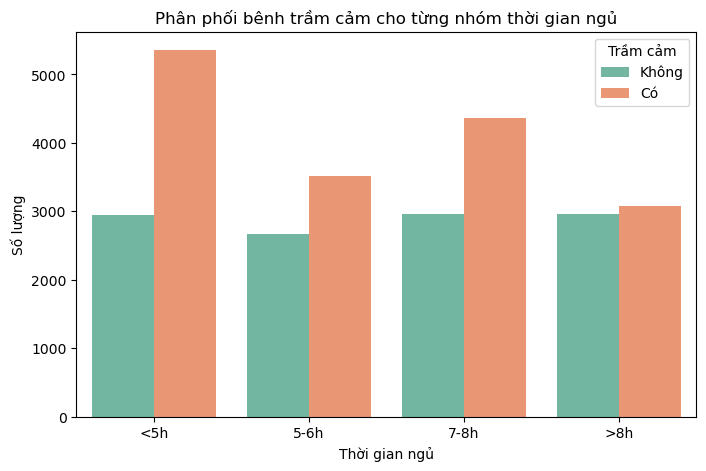

In [26]:
##Vẽ

# # Kiểm tra dữ liệu trước khi vẽ
# print("Số lượng dữ liệu:", len(sleep_analyze_df))
# print("Giá trị duy nhất:", sleep_analyze_df['Sleep Duration'].unique())
# print("Thống kê mô tả:\n", sleep_analyze_df['Sleep Duration'].describe())

plt.figure(figsize=(8,5))
sns.countplot(x='Sleep Duration', 
              hue='Depression', 
              data=sleep_analyze_df, 
              palette="Set2",
              order=['<5h', '5-6h', '7-8h', '>8h'])
plt.title("Phân phối bênh trầm cảm cho từng nhóm thời gian ngủ")
plt.xlabel("Thời gian ngủ")
plt.ylabel("Số lượng")
plt.legend(title="Trầm cảm",
           labels=['Không', 'Có'])
plt.show()

- Thuộc tính sử dụng: `Sleep Duration`
- Nội dung biểu đồ:
    - Biểu đồ là histogram (cột) cho từng nhóm thời gian ngủ và tình trạng tâm lý trong nhóm tương ứng.

    - Nhận xét chung:

        - < 5 giờ → Rất nhiều sinh viên ngủ ít

        - 7 - 8 giờ → Nhiều sinh viên ngủ gần đủ giấc

        - \> 8 giờ → Một số sinh viên ngủ nhiều hơn

C:\Users\DELL\AppData\Local\Temp\ipykernel_7328\3014627029.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


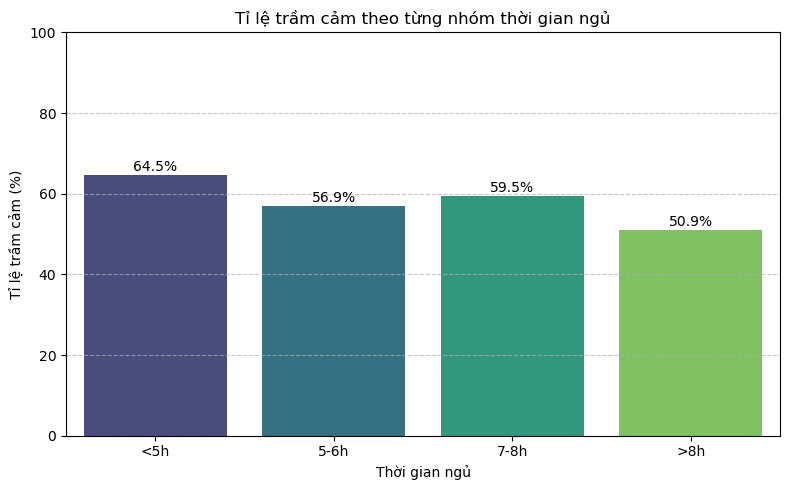

In [24]:
# Đếm tổng số mỗi giá trị Depression theo từng nhóm Sleep Duration
group_counts = sleep_analyze_df.groupby('Sleep Duration')['Depression'].value_counts(normalize=True)

# Lấy phần trăm giá trị 1 (Trầm cảm) trong mỗi nhóm Sleep Duration
percent_depression_per_sleep_duration = group_counts.loc[:, 1] * 100
percent_depression_per_sleep_duration_df = percent_depression_per_sleep_duration.reset_index(name='% of Depression')

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=percent_depression_per_sleep_duration_df,
    x='Sleep Duration',
    y='% of Depression',
    palette='viridis',
    order=['<5h', '5-6h', '7-8h', '>8h']
)

# Thêm nhãn giá trị trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center'
    )

# Tuỳ chỉnh
plt.title('Tỉ lệ trầm cảm theo từng nhóm thời gian ngủ')
plt.xlabel('Thời gian ngủ')
plt.ylabel('Tỉ lệ trầm cảm (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị
plt.show()

- Thuộc tính sử dụng: `Sleep Duration`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ thể hiện tỉ lệ sinh viên bị trầm cảm cho từng nhóm thời gian ngủ: Các cột (boxplot) đại diện cho tỉ lệ sinh viên bị trầm cảm đối với thời gian ngủ tương ứng

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: (Upload hình ảnh) Quan sát biểu đồ, không cần mô tả lại biểu đồ. Với thông tin thực tế rằng thiếu ngủ là một trong những yếu tố nguy cơ hàng đầu gây ra stress và trầm cảm, biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, đến từ nhiều ngành học khác nhau, cho thấy rõ sự khác biệt về tỉ lệ trầm cảm theo từng nhóm thời gian ngủ.

**Nhận xét chung**:

- Biểu đồ cho thấy rõ ràng nhóm ngủ ít hơn 5 tiếng có tỉ lệ trầm cảm cao nhất (64.5%), và nhóm ngủ trên 8 tiếng có tỉ lệ trầm cảm thấp nhất (50.9%).

- Điều này phù hợp với thực tế khoa học rằng thiếu ngủ là yếu tố nguy cơ rất lớn gây stress và trầm cảm.

- Ngoài ra, điểm thú vị là nhóm ngủ 7-8 tiếng – vốn được coi là mức ngủ lý tưởng – lại có tỉ lệ trầm cảm (59.5%) cao hơn nhóm ngủ 5-6 tiếng (56.9%).

- Điều này có thể gợi ý rằng chất lượng giấc ngủ hoặc những yếu tố khác như áp lực học tập, lối sống, tâm lý cũng ảnh hưởng lớn, chứ không chỉ đơn thuần thời lượng ngủ.

**Prompt hỗ trợ phân tích sâu hơn**: đưa ra những nguyên nhân sâu xa, có liên quan đến bối cảnh xã hội, tương tác 2 chiều giữa giấc ngủ và trầm cảm.

1. Áp lực xã hội và học tập
- Học sinh, sinh viên Ấn Độ chịu áp lực rất lớn từ gia đình, nhà trường và xã hội về thành tích học tập, thi cử, nghề nghiệp tương lai.
- Áp lực này gây stress mãn tính, dẫn đến mất ngủ, ngủ ít.
- Thiếu ngủ kéo dài làm hệ thần kinh dễ tổn thương, giảm khả năng điều tiết cảm xúc, tăng nguy cơ trầm cảm.

2. Tương tác 2 chiều: trầm cảm ảnh hưởng ngược lại đến giấc ngủ
- Người bị trầm cảm thường khó ngủ, dễ thức dậy giữa đêm hoặc ngủ không sâu.
- Ngược lại, thiếu ngủ lại làm trầm trọng thêm các triệu chứng trầm cảm như buồn bã, mất động lực, cảm giác vô vọng.
- Từ đó tạo thành vòng xoáy tiêu cực: mất ngủ → trầm cảm nặng hơn → mất ngủ nhiều hơn.

3. Văn hóa “hustle culture” và “chạy đua thành tích”
- Ở nhiều môi trường học thuật, việc thức khuya học bài hoặc làm việc thâu đêm được xem là bình thường hoặc thậm chí được tán dương.
- Điều này làm giấc ngủ bị đánh đổi để lấy sự công nhận xã hội, vô tình phá vỡ nhịp sinh học của cơ thể, tăng rối loạn tâm lý.

4. Công nghệ và thói quen xấu trước khi ngủ
- Sử dụng điện thoại, mạng xã hội, game vào ban đêm rất phổ biến.
- Ánh sáng xanh từ màn hình làm ức chế melatonin, hormone gây buồn ngủ, khiến thời gian ngủ bị trễ.
- Các nội dung tiêu cực, tin tức xấu cũng kích thích lo âu, ảnh hưởng đến chất lượng giấc ngủ và sức khỏe tâm thần.

5. Bất bình đẳng xã hội và điều kiện sống
- Những sinh viên đến từ hộ nghèo, hoặc vùng nông thôn lên thành phố học dễ chịu áp lực tài chính, thiếu thốn điều kiện sống (phòng trọ chật chội, ồn ào), khiến giấc ngủ không đảm bảo.
- Đồng thời, cảm giác bị cô lập xã hội hoặc áp lực hội nhập cũng là yếu tố nguy cơ lớn cho trầm cảm.

**Kết luận và gợi ý hướng giải pháp**:
Do đó, để giảm tỉ lệ trầm cảm trong nhóm học sinh, sinh viên, cần triển khai những biện pháp đa chiều:

- Giáo dục về vệ sinh giấc ngủ (sleep hygiene) và quản lý stress.

- Giảm áp lực thi cử, thay đổi cách đánh giá thành tích trong giáo dục.

- Tăng cường hỗ trợ tâm lý học đường và xây dựng môi trường học tập thân thiện, bao dung.

- Định hướng lại quan niệm xã hội về việc nghỉ ngơi và sức khỏe tâm thần, thay vì đề cao sự làm việc kiệt sức.

#### 🧠 Phân tích sâu về ảnh hưởng của giấc ngủ.

##### 1. ❓ Vì sao sinh viên ngủ ít?
- Trong thời đại 4.0, áp lực đồng trang lứa cạnh tranh lẫn nhau khiến cho học sinh bị áp lực trong học tập và công việc: Có thể khiến họ làm việc hoặc học đến khuya.
- Lối sống hiện đại: Mạng xã hội, giải trí, điện thoại, máy tính làm trì hoãn giờ ngủ.
- Sức khỏe tâm thần: Trầm cảm, lo âu có thể gây mất ngủ hoặc giấc ngủ ngắn, rối loạn.

##### 2. ⚠️ Ngủ ít có gây trầm cảm? Hay trầm cảm khiến ngủ ít?
- Ngủ từ 7–8 giờ có mức trầm cảm trung bình thấp nhất → Đây là khung giờ ngủ lý tưởng.
- Ngủ ít hơn 5 tiếng hoặc 5–6 tiếng có tỉ lệ trầm cảm cao hơn rõ rệt → Giấc ngủ ngắn liên quan đến nguy cơ stress cao hơn.
- Một số nhóm như “More than 9 hours” có stress cao có thể do 1 nhóm nhỏ người đối kháng với stress bằng việc đi ngủ.

##### 3. 🌐 Vai trò của bối cảnh xã hội và cá nhân
- Giới tính: Nam hay nữ chịu áp lực khác nhau?
- Ngành học / nghề nghiệp: Một số ngành đòi hỏi thời gian học/làm nhiều hơn.
- Hỗ trợ tâm lý & môi trường học tập: Có thể cải thiện chất lượng giấc ngủ.

##### 4. ✅ Kết luận
> Giấc ngủ trung bình của sinh viên trong bộ dữ liệu thấp hơn khuyến nghị, đặc biệt có một nhóm lớn ngủ ít hơn 5 giờ/ngày. Đây là dấu hiệu cảnh báo cần can thiệp về mặt giáo dục, tổ chức thời gian và chăm sóc tinh thần. Việc ngủ không đủ giấc có thể là chỉ báo sớm của các vấn đề sức khỏe tâm thần như trầm cảm hoặc stress học đường.


### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 3: Sinh viên và vấn đề với bệnh trầm cảm.</span> <a id="ii1"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Trầm cảm trong học đường, đặc biệt ở sinh viên và học sinh, đang là một vấn đề sức khoẻ tâm thần đáng báo động. Sinh viên là nhóm đang trong giai đoạn chuyển giao mạnh mẽ giữa tuổi thiếu niên và trưởng thành, phải đối mặt với:

- Áp lực học tập, thi cử, cạnh tranh

- Lo âu về tương lai, nghề nghiệp, tài chính

- Cô đơn, thiếu kết nối xã hội khi xa nhà hoặc trong môi trường mới

Theo WHO, trầm cảm là một trong những nguyên nhân hàng đầu gây tàn tật và tử vong (tự tử) ở người trẻ tuổi.

* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

- Nhận diện nhóm có nguy cơ cao để can thiệp sớm

- Giúp các trường học, tổ chức xã hội hiểu rõ hơn về tác động tâm lý của việc học

- Khuyến khích cải thiện môi trường học tập lành mạnh, đồng thời nâng cao nhận thức về chăm sóc sức khỏe tinh thần

* <span style="font-style:italic;">Trực quan hoá</span>

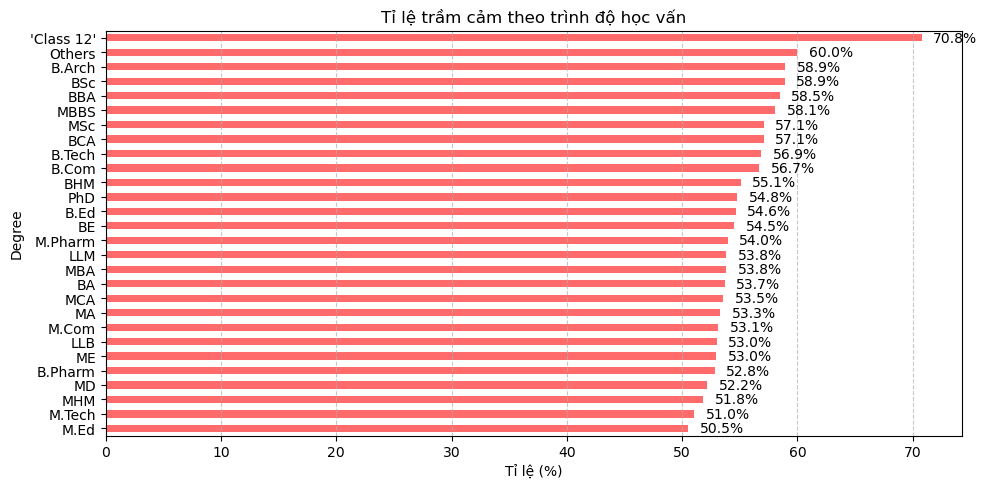

In [12]:
student_depression_analyze_df = data.copy()

total_by_degree = student_depression_analyze_df.groupby('Degree').size()
depressed_by_degree = student_depression_analyze_df[student_depression_analyze_df['Depression'] == 1].groupby('Degree').size()
depression_rate_by_degree = (depressed_by_degree / total_by_degree) * 100

depression_rate_by_degree.sort_values().plot(kind='barh', color='#FF6B6B', figsize=(10, 5))
plt.title('Tỉ lệ trầm cảm theo trình độ học vấn')
plt.xlabel('Tỉ lệ (%)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, val in enumerate(depression_rate_by_degree.sort_values()):
    plt.text(val + 1, i, f'{val:.1f}%', va='center')
plt.tight_layout()
plt.show()



- Thuộc tính sử dụng: `Degree`, `Depression`
- Nội dung biểu đồ:
    - Những người có trình độ học vấn thấp hơn (ví dụ như 'Class 12' – tương đương lớp 12 ở Ấn Độ) có tỷ lệ trầm cảm cao nhất (70.8%).

    - Tỷ lệ này giảm dần ở những trình độ học vấn cao hơn, đặc biệt trong nhóm sau đại học như MD, M.Ed, M.Tech.

    - Có thể giải thích do:

        - Các bạn học sinh cấp 3 đang ở giai đoạn "bản lề" với nhiều áp lực định hướng tương lai.

        - Người học cao hơn có thể đã thích nghi tốt hơn, phát triển cơ chế đối phó, hoặc đơn giản là nhóm “sống sót” qua các cấp học là những người ít bị ảnh hưởng tâm lý hơn.



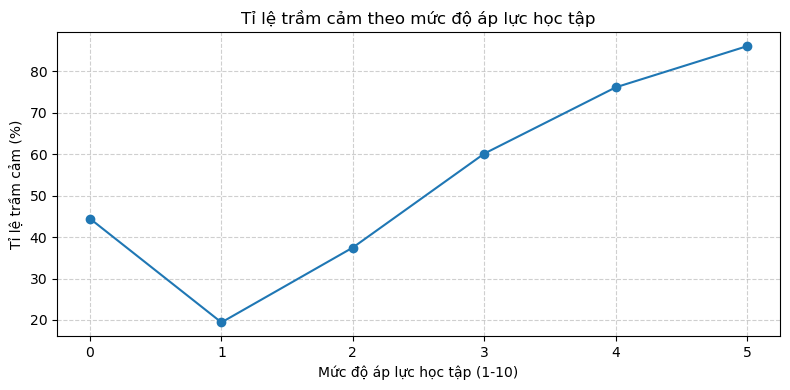

In [13]:
pressure_rate = student_depression_analyze_df.groupby('Academic Pressure')['Depression'].mean() * 100

pressure_rate.plot(kind='line', marker='o', color='#1f77b4', figsize=(8, 4))
plt.title('Tỉ lệ trầm cảm theo mức độ áp lực học tập')
plt.xlabel('Mức độ áp lực học tập (1-10)')
plt.ylabel('Tỉ lệ trầm cảm (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Academic Pressure`, `Depression`
- Nội dung biểu đồ:
    - Khi áp lực học tập tăng, tỷ lệ trầm cảm tăng mạnh:

        - Ở mức áp lực 1: chỉ ~20%

        - Ở mức áp lực 5: lên đến ~87%

    - Mối quan hệ gần như tuyến tính tăng, phản ánh rằng áp lực học tập là một yếu tố nguy cơ trực tiếp dẫn đến trầm cảm.

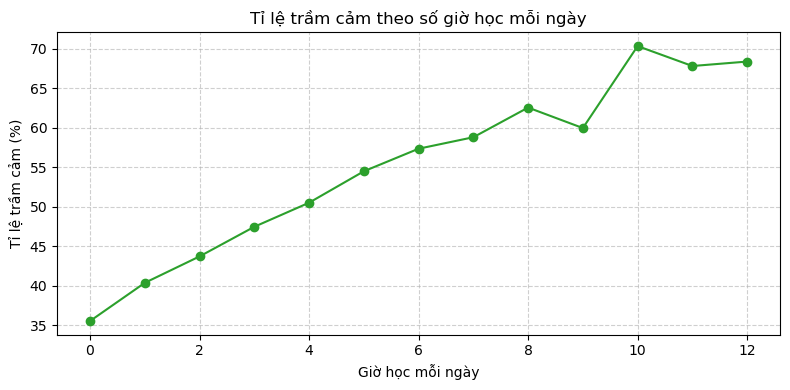

In [14]:
study_hours_rate = student_depression_analyze_df.groupby('Work/Study Hours')['Depression'].mean() * 100

study_hours_rate.plot(kind='line', marker='o', color='#2ca02c', figsize=(8, 4))
plt.title('Tỉ lệ trầm cảm theo số giờ học mỗi ngày')
plt.xlabel('Giờ học mỗi ngày')
plt.ylabel('Tỉ lệ trầm cảm (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Work/Study Hours`, `Depression`
- Nội dung biểu đồ:
    - Có xu hướng tăng đều: học càng nhiều giờ, nguy cơ trầm cảm càng cao.

    - Đặc biệt, sau ngưỡng 9–10 giờ/ngày, tỷ lệ trầm cảm chạm mức ~70%.

    - Dễ nhận thấy rằng việc thiếu thời gian nghỉ ngơi, học quá tải có ảnh hưởng tiêu cực rõ rệt đến sức khỏe tâm thần.

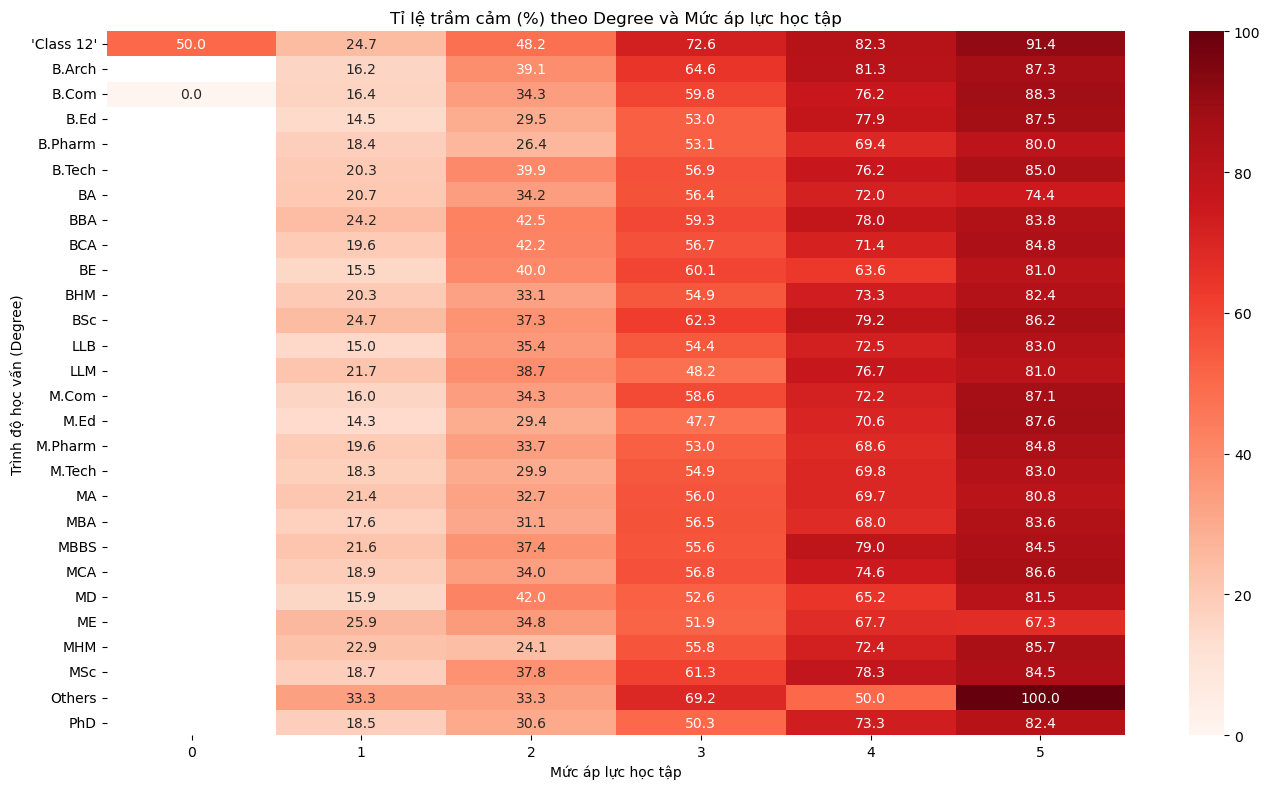

In [15]:
# Giả sử df là dataframe ban đầu
pivot = student_depression_analyze_df.groupby(['Degree', 'Academic Pressure'])['Depression'].mean().unstack() * 100

plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title("Tỉ lệ trầm cảm (%) theo Degree và Mức áp lực học tập")
plt.xlabel("Mức áp lực học tập")
plt.ylabel("Trình độ học vấn (Degree)")
plt.tight_layout()
plt.show()


- Thuộc tính sử dụng: `Academic Pressure`, `Degree`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ là heatmap thể hiện tỉ lệ trầm cảm theo `Degree` và `Academic Pressure`.
    
    - Mỗi dòng là 1 `Degree`.

    - Mỗi cột là mức `Academic Pressure`.

    - Màu thể hiện tỉ lệ trung bình `Depression`.

* <span style="font-style:italic;">Phân tích và kết luận</span>

**Prompt hỗ trợ phân tích**: Quan sát biểu đồ, không cần mô tả lại biểu đồ. Với thông tin thực tế rằng thiếu ngủ là một trong những yếu tố nguy cơ hàng đầu gây ra stress và trầm cảm, biểu đồ trên được xây dựng từ một nhóm đối tượng là học sinh, sinh viên Ấn Độ, phần lớn dưới 25 tuổi, đến từ nhiều ngành học khác nhau, cho thấy rõ sự khác biệt về điểm trầm cảm trung bình theo thời lượng ngủ.

#### 🧠 Phân tích sâu về mối liên hệ giữa học vấn và trầm cảm

##### 1. 🎓 Tại sao trình độ học vấn lại ảnh hưởng đến trầm cảm?
- Ở trình độ thấp (ví dụ: cấp 3), học sinh:

    - Chịu áp lực thi cử, chọn ngành, định hướng tương lai.

    - Thường thiếu sự hỗ trợ tâm lý hoặc kỹ năng ứng phó.

- Ngược lại, người học sau đại học:

    - Có thể đã qua giai đoạn khó khăn nhất.

    - Có sự ổn định về mặt nhận thức và mục tiêu học tập.

##### 2. 💥 Áp lực học tập là nguyên nhân chính gây ra trầm cảm?
- Biểu đồ xác nhận điều này: áp lực càng cao → trầm cảm càng nhiều.

- Điều này phản ánh cần giáo dục kỹ năng quản lý stress và học hiệu quả trong nhà trường.

- Đồng thời cần làm việc với gia đình để tạo cho học sinh/sinh viên một môi trường học tập lành mạnh.

##### 3. ⏱️ Số giờ học dài không tương đương hiệu quả học tập
- Việc học quá 8–9 giờ/ngày có thể phản tác dụng.

- Gây kiệt sức về mặt tinh thần, thiếu ngủ, giảm hiệu quả học tập → góp phần vào trầm cảm.

- Học sinh/sinh viên nên học cách quản lý giấc ngủ phù hợp không nên ngủ quá nhiều cũng không nên ngủ quá ít.

##### 4. 🔺 Tỉ lệ trầm cảm tăng mạnh theo áp lực học tập
- Tại mọi trình độ học vấn, ta thấy xu hướng rất rõ ràng: mức áp lực càng cao thì tỉ lệ trầm cảm càng tăng.

- Ví dụ:

    - MSc: từ 18.7% (áp lực 0) → 78.3% (áp lực 4)

    - 'Class 12': từ 50.0% (áp lực 0) → 91.4% (áp lực 5)

- Đây là mối tương quan trực tiếp và mạnh giữa áp lực học tập và sức khỏe tinh thần.

- 'Class 12' đặc biệt nổi bật:

    - Mức áp lực = 0 vẫn có 50% bị trầm cảm – cao nhất ở cột này.

    - Gợi ý rằng nhóm này có thể chịu ảnh hưởng bởi các yếu tố khác như:

    - Áp lực từ gia đình, kỳ vọng thi cử, chưa có kỹ năng đối phó với căng thẳng.

- Others và PhD cũng có tỷ lệ trầm cảm > 30% khi áp lực chỉ ở mức 0 hoặc 1.

- Các nhóm như M.Tech, MBA, MA, MCA, LLB, MD... thường có tỉ lệ trầm cảm thấp hơn khi so cùng mức áp lực.

- Ví dụ:

    - M.Tech: 29.9% (áp lực 1) → 69.8% (áp lực 4)

    - LLB: 35.4% (áp lực 1) → 72.5% (áp lực 4)

- Các nhóm này có thể đã quen với áp lực, có môi trường học chuyên sâu, hoặc hỗ trợ xã hội tốt hơn.

##### 5. ✅ Kết luận
> Trầm cảm là hệ quả rõ ràng của môi trường học tập quá căng thẳng. Phân tích trên cho thấy các yếu tố như trình độ học vấn thấp, áp lực học tập cao và số giờ học dài đều có liên quan mật thiết đến tỷ lệ trầm cảm. 👉 Để giảm thiểu tình trạng này, các trường học và gia đình nên:

- Giảm áp lực học tập phi thực tế.

- Cung cấp hỗ trợ tâm lý.

- Khuyến khích cân bằng giữa học – nghỉ ngơi – hoạt động xã hội.

### <span style="color:#CCCCCC; font-weight:bold;"> Chủ đề 4: Chế độ ăn uống và sức khỏe tâm thần</span> <a id="ii1"></a>

* <span style="font-style:italic;">Tại sao chủ đề này quan trọng</span>

Chế độ ăn uống và sức khỏe tâm thần có mối liên hệ mật thiết nhưng thường bị bỏ qua trong các nghiên cứu về sinh viên. Tầm quan trọng của chủ đề này thể hiện ở các điểm sau:

- Cơ chế sinh học: Chế độ ăn uống trực tiếp ảnh hưởng đến sự cân bằng hóa học trong não, điều này có thể tác động đến tâm trạng và sức khỏe tâm thần. Các chất dinh dưỡng như omega-3, vitamin nhóm B, và chất chống oxy hóa đều có vai trò trong việc điều chỉnh các chất dẫn truyền thần kinh.
- Giai đoạn phát triển quan trọng: Sinh viên thường ở độ tuổi khi các thói quen ăn uống được hình thành và có thể ảnh hưởng đến sức khỏe tâm thần lâu dài.
- Thói quen ăn uống của sinh viên: Sinh viên thường có chế độ ăn uống không cân đối do hạn chế về thời gian, tài chính và kiến thức dinh dưỡng. Điều này tạo ra một nhóm có nguy cơ cao về cả vấn đề dinh dưỡng và sức khỏe tâm thần.
- Tác động kép: Mối quan hệ giữa chế độ ăn uống và sức khỏe tâm thần là hai chiều - trầm cảm có thể dẫn đến thay đổi thói quen ăn uống, và ngược lại, ăn uống kém lành mạnh có thể làm trầm trọng thêm các vấn đề tâm thần.
- Tiềm năng can thiệp: Hiểu rõ mối liên hệ này có thể dẫn đến các biện pháp can thiệp hiệu quả về chi phí và ít xâm lấn thông qua cải thiện chế độ ăn uống.

* <span style="font-style:italic;">Lợi ích khi phân tích vấn đề này</span>

Việc phân tích mối liên hệ giữa chế độ ăn uống và sức khỏe tâm thần trong bộ dữ liệu này mang lại nhiều lợi ích:

- Định hướng chính sách trường học: Có thể dẫn đến các chương trình dinh dưỡng được cải thiện trong các trường đại học, như cung cấp thêm thực phẩm lành mạnh trong căng tin trường học.
- Phát triển chương trình can thiệp: Xác định các nhóm sinh viên cụ thể có nguy cơ cao hơn do kết hợp giữa chế độ ăn uống không lành mạnh và các yếu tố căng thẳng khác.
- Giáo dục sinh viên: Tạo cơ sở cho các chương trình giáo dục nâng cao nhận thức về tầm quan trọng của dinh dưỡng đối với sức khỏe tâm thần.
- Tư vấn cá nhân hóa: Cung cấp thông tin cho các dịch vụ tư vấn sinh viên về cách tích hợp các khuyến nghị dinh dưỡng vào các kế hoạch hỗ trợ sức khỏe tâm thần.
- Cải thiện kết quả học tập: Hiểu rõ mối liên hệ giữa chế độ ăn uống, sức khỏe tâm thần và hiệu suất học tập (CGPA) có thể dẫn đến các chiến lược cải thiện kết quả học tập.

* <span style="font-style:italic;">Trực quan hoá</span>

C:\Users\DELL\AppData\Local\Temp\ipykernel_7328\3726627107.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dietary Habits', y='Depression Rate (%)', data=diet_depression_analyze, palette='viridis')


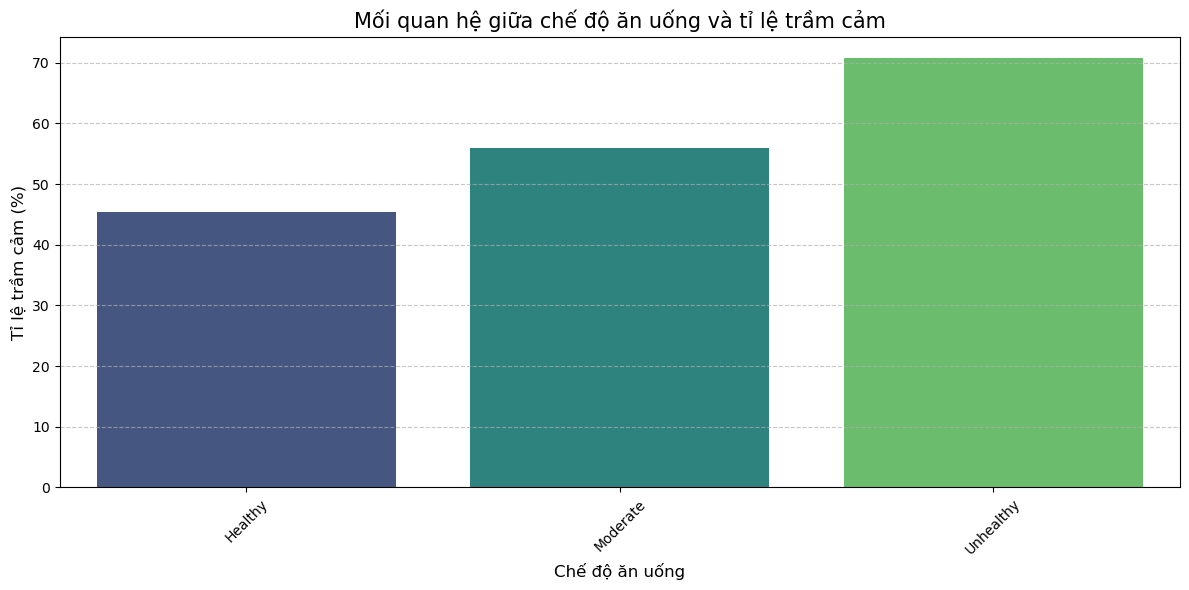

In [16]:
# Bắt đầu từ dữ liệu gốc, loại bỏ 'Others' và gán vào diet_depression_analyze
diet_depression_analyze = data[data['Dietary Habits'] != 'Others'].copy()

# Tổng số người theo từng chế độ ăn uống
total_by_diet = diet_depression_analyze.groupby('Dietary Habits').size()

# Tổng số người trầm cảm theo từng chế độ ăn uống
depressed_by_diet = diet_depression_analyze[diet_depression_analyze['Depression'] == 1].groupby('Dietary Habits').size()

# Tính tỉ lệ % người trầm cảm theo chế độ ăn
depression_rate = (depressed_by_diet / total_by_diet) * 100

# Gán vào diet_depression_analyze bằng map
diet_depression_analyze['Depression Rate (%)'] = diet_depression_analyze['Dietary Habits'].map(depression_rate)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x='Dietary Habits', y='Depression Rate (%)', data=diet_depression_analyze, palette='viridis')
plt.title('Mối quan hệ giữa chế độ ăn uống và tỉ lệ trầm cảm', fontsize=15)
plt.xlabel('Chế độ ăn uống', fontsize=12)
plt.ylabel('Tỉ lệ trầm cảm (%)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Dietary Habit`, `Depression`
- Nội dung biểu đồ:
    - Biểu đồ cột thể hiện tỉ lệ phần trăm người trầm cảm theo từng nhóm chế độ ăn uống:

        - Healthy (Ăn uống lành mạnh)

        - Moderate (Ăn uống vừa phải)

        - Unhealthy (Ăn uống không lành mạnh)

    - Healthy: có tỉ lệ trầm cảm thấp nhất, khoảng 45%.

    - Moderate: tỉ lệ trầm cảm cao hơn Healthy, khoảng 56%.

    - Unhealthy: tỉ lệ trầm cảm cao nhất, lên tới 71%.

<Figure size 1200x600 with 0 Axes>

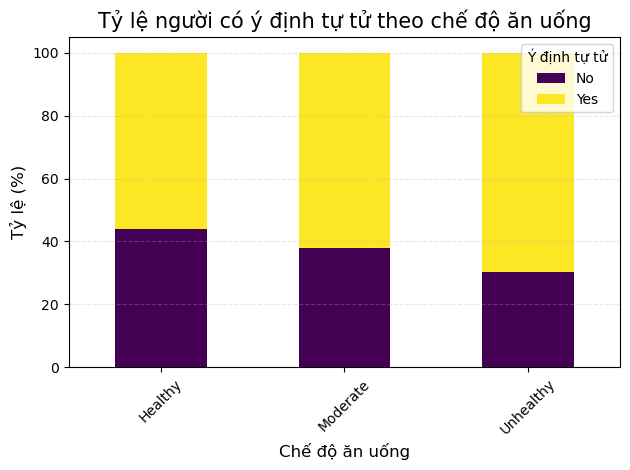

In [17]:
# 2. Phân tích mối quan hệ giữa chế độ ăn uống và ý định tự tử
plt.figure(figsize=(12, 6))
suicide_by_diet = pd.crosstab(diet_depression_analyze['Dietary Habits'], diet_depression_analyze['Have you ever had suicidal thoughts ?'], normalize='index') * 100
suicide_by_diet.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Tỷ lệ người có ý định tự tử theo chế độ ăn uống', fontsize=15)
plt.xlabel('Chế độ ăn uống', fontsize=12)
plt.ylabel('Tỷ lệ (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Ý định tự tử', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Dietary Habit`, `Have you ever had suicidal thoughts ?`
- Nội dung biểu đồ:
    - Biểu đồ cột xếp chồng thể hiện tỉ lệ % người có và không có ý định tự tử trong mỗi nhóm:

        - Healthy (Ăn uống lành mạnh)

        - Moderate (Ăn uống vừa phải)

        - Unhealthy (Ăn uống không lành mạnh)

    - Healthy: khoảng 45% người không có ý định tự tử, 55% có ý định.

    - Moderate: người có ý định tự tử chiếm tỷ lệ cao hơn nhóm Healthy, khoảng 60%.

    - Unhealthy: có tỉ lệ người từng có ý định tự tử cao nhất, khoảng 70%.

C:\Users\DELL\AppData\Local\Temp\ipykernel_7328\1818549221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dietary Habits', y='CGPA', data=diet_depression_analyze, palette='viridis')


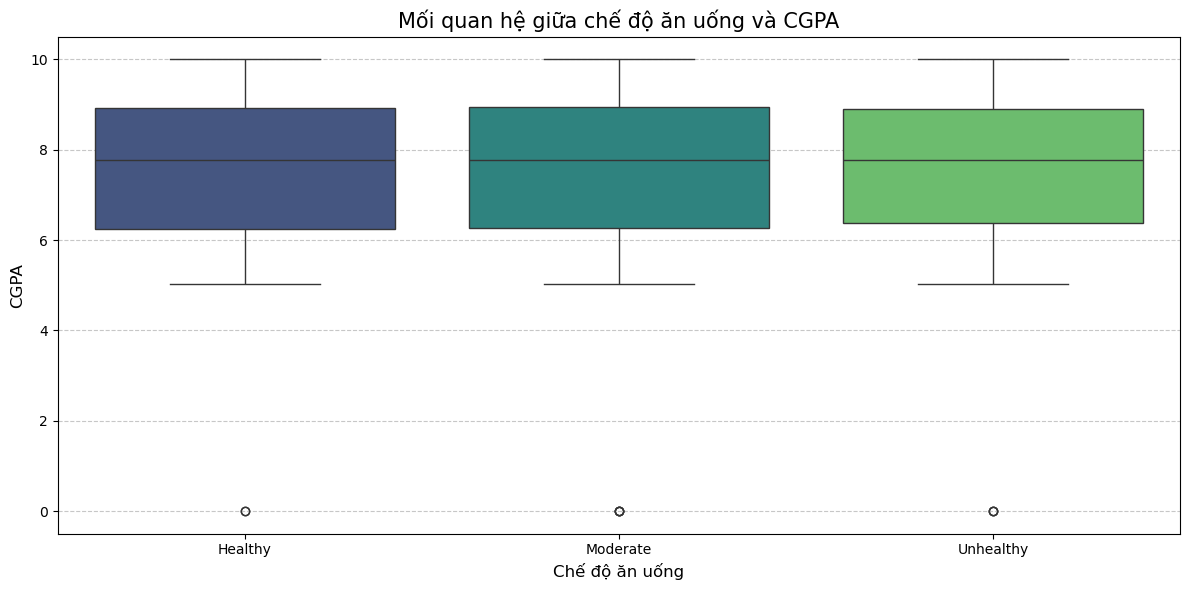

In [18]:
# 3. Phân tích mối quan hệ giữa chế độ ăn uống và CGPA
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dietary Habits', y='CGPA', data=diet_depression_analyze, palette='viridis')
plt.title('Mối quan hệ giữa chế độ ăn uống và CGPA', fontsize=15)
plt.xlabel('Chế độ ăn uống', fontsize=12)
plt.ylabel('CGPA', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Dietary Habit`, `CGPA`
- Nội dung biểu đồ:
    - Boxplot thể hiện sự phân bố điểm CGPA (điểm trung bình tích lũy) theo 3 nhóm:

        - Healthy (Ăn uống lành mạnh)

        - Moderate (Ăn uống vừa phải)

        - Unhealthy (Ăn uống không lành mạnh)

    - Tất cả nhóm đều có median (trung vị) CGPA khá tương đồng, nằm khoảng 7.5 - 8.

    - Phân phối CGPA trong 3 nhóm khá tương tự nhau:

    - Khoảng từ 5 đến 10 điểm CGPA.

    - Có một số ngoại lệ (outliers) rất thấp gần 0, nhưng không đáng kể.

    - Nhóm Healthy có xu hướng hơi ít outliers hơn so với nhóm Unhealthy, nhưng không khác biệt rõ rệt.v

C:\Users\DELL\AppData\Local\Temp\ipykernel_7328\1354347554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dietary Habits', y='Sleep Hours', data=diet_depression_analyze, palette='viridis')


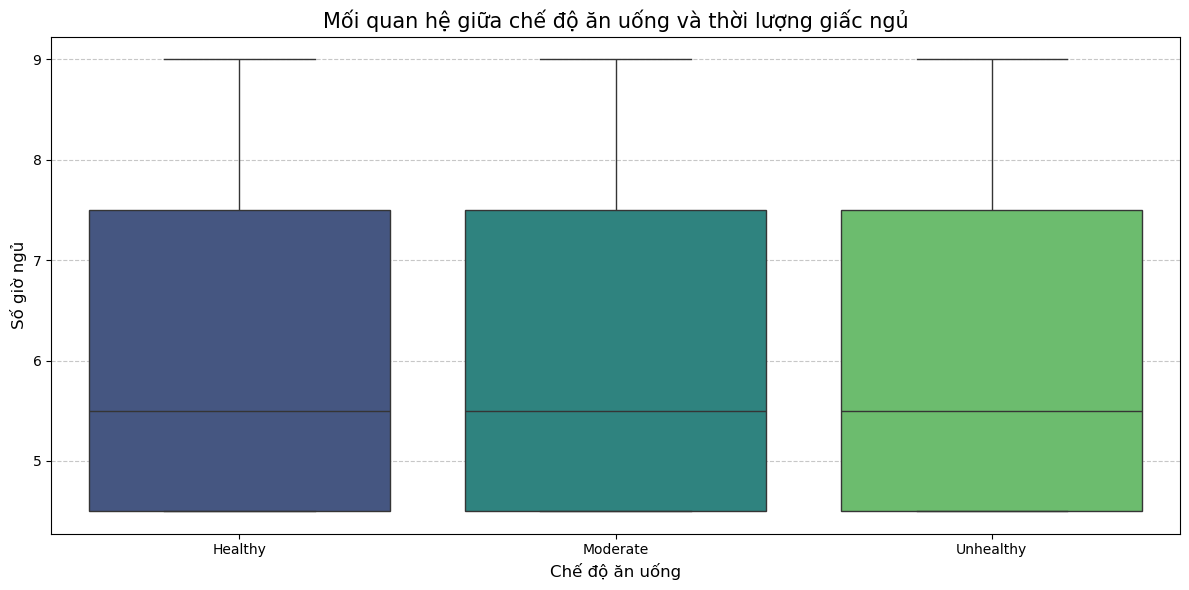

In [19]:
# 4. Phân tích mối quan hệ giữa chế độ ăn uống và thời lượng giấc ngủ
# Mapping sleep duration từ dạng phân loại sang giá trị số trung bình
sleep_map = {
    "'Less than 5 hours'": 4.5,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 9
}
diet_depression_analyze['Sleep Hours'] = diet_depression_analyze['Sleep Duration'].map(sleep_map)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dietary Habits', y='Sleep Hours', data=diet_depression_analyze, palette='viridis')
plt.title('Mối quan hệ giữa chế độ ăn uống và thời lượng giấc ngủ', fontsize=15)
plt.xlabel('Chế độ ăn uống', fontsize=12)
plt.ylabel('Số giờ ngủ', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Dietary Habit`, `Sleep Hours`
- Nội dung biểu đồ:
    - Boxplot thể hiện sự phân bố số giờ ngủ mỗi ngày theo 3 nhóm chế độ ăn:

        - Healthy

        - Moderate

        - Unhealthy

    - Median (trung vị) số giờ ngủ của cả 3 nhóm đều gần 5.5 giờ — khá thấp so với khuyến nghị (7–9 giờ/ngày).

    - Phân phối số giờ ngủ khá giống nhau ở cả 3 nhóm.

    - Khoảng từ 4 giờ đến 9 giờ.

    - Không có outlier bất thường.

    - Chế độ ăn uống không tạo ra sự khác biệt lớn về số giờ ngủ.

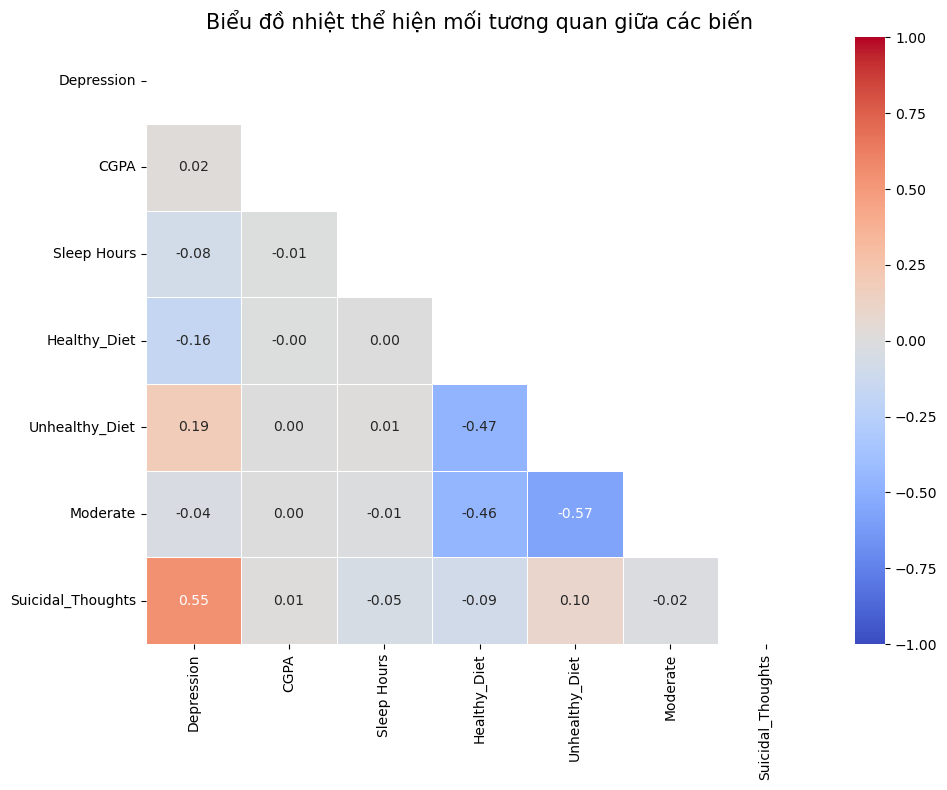

In [20]:
# 5. Biểu đồ nhiệt thể hiện mối tương quan giữa các biến
# Tạo một subset của dữ liệu với các biến cần thiết
corr_data = diet_depression_analyze[['Depression', 'CGPA', 'Sleep Hours']].copy()
# Thêm các biến mới dựa trên các biến phân loại
corr_data['Healthy_Diet'] = (diet_depression_analyze['Dietary Habits'] == 'Healthy').astype(int)
corr_data['Unhealthy_Diet'] = (diet_depression_analyze['Dietary Habits'] == 'Unhealthy').astype(int)
corr_data['Moderate'] = (diet_depression_analyze['Dietary Habits'] == 'Moderate').astype(int)
corr_data['Suicidal_Thoughts'] = (diet_depression_analyze['Have you ever had suicidal thoughts ?'] == 'Yes').astype(int)

plt.figure(figsize=(10, 8))
correlation = corr_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', 
            mask=mask, vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('Biểu đồ nhiệt thể hiện mối tương quan giữa các biến', fontsize=15)
plt.tight_layout()
plt.show()

- Thuộc tính sử dụng: `Dietary Habit`, `Sleep Hours`, `Depression`, `CGPA`, `Have you ever had suicidal thoughts ?`
- Nội dung biểu đồ:
    - Heatmap thể hiện hệ số tương quan Pearson giữa các biến:

        - Depression, CGPA, Sleep Hours, Healthy Diet, Unhealthy Diet, Moderate Diet, Suicidal Thoughts.

|Cặp biến	                    |Hệ số tương quan	|Ý nghĩa
| ----------------------------- | ----------------- | ------- |
|Depression – Suicidal Thoughts	|0.55	            |Tương quan dương mạnh: Trầm cảm cao thì ý định tự tử cao.
|Healthy Diet – Unhealthy Diet	|-0.47	            |Tương quan âm: Ăn lành mạnh thì ít ăn không lành mạnh, hợp lý.
|Moderate Diet – Unhealthy Diet	|-0.57	            |Tương quan âm mạnh: Chế độ ăn vừa phải thì cũng ít ăn không lành mạnh.
|Depression – Healthy Diet	    |-0.16	            |Tương quan âm nhẹ: Ăn uống lành mạnh giảm nhẹ mức độ trầm cảm.
|Depression – Unhealthy Diet	|0.19	            |Tương quan dương nhẹ: Ăn không lành mạnh tăng nhẹ trầm cảm.
|Sleep Hours – Depression	    |-0.08	            |Ngủ ít thì có khả năng trầm cảm cao hơn, nhưng mức độ rất yếu.
|Các biến khác (ví dụ: CGPA)	|≈ 0	            |Không có tương quan đáng kể.

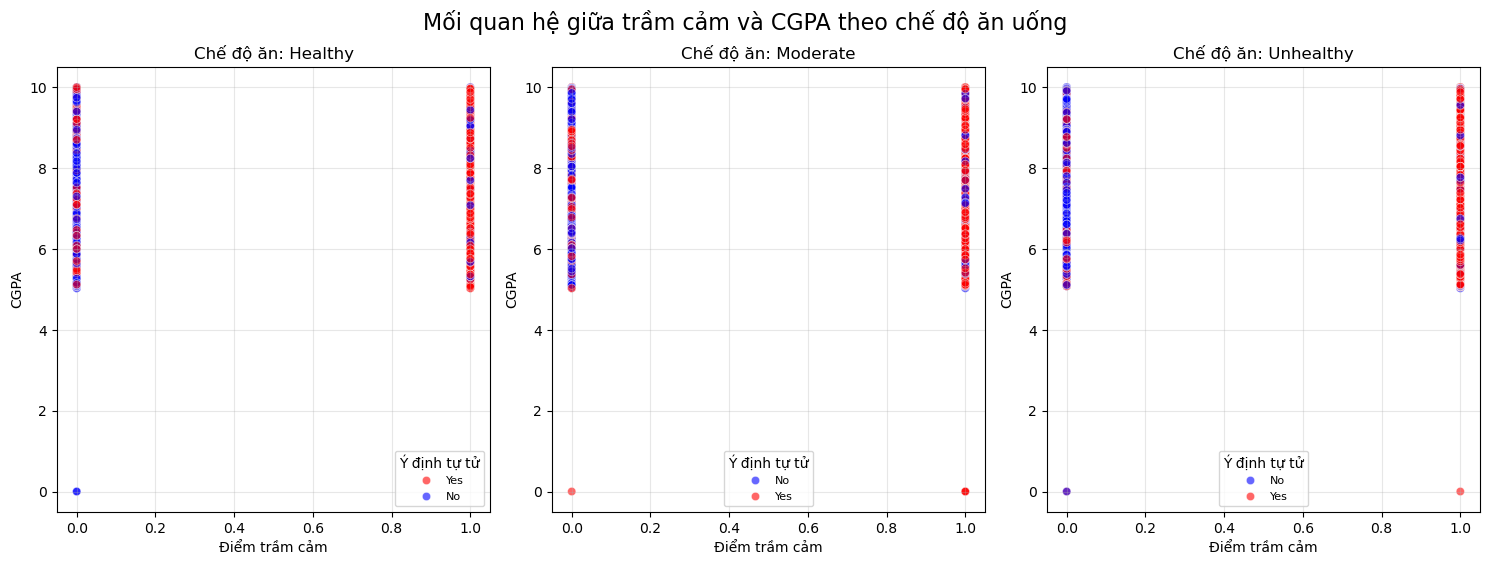

In [21]:
# 6. Phân tích chi tiết mối quan hệ giữa chế độ ăn uống, trầm cảm và CGPA
plt.figure(figsize=(15, 10))
for i, diet in enumerate(['Healthy', 'Moderate', 'Unhealthy']):
    plt.subplot(2, 3, i+1)
    subset = diet_depression_analyze[diet_depression_analyze['Dietary Habits'] == diet]
    sns.scatterplot(x='Depression', y='CGPA', data=subset, 
                    hue='Have you ever had suicidal thoughts ?', 
                    palette={'Yes': 'red', 'No': 'blue'}, alpha=0.6)
    plt.title(f'Chế độ ăn: {diet}', fontsize=12)
    plt.xlabel('Điểm trầm cảm', fontsize=10)
    plt.ylabel('CGPA', fontsize=10)
    plt.grid(alpha=0.3)
    plt.legend(title='Ý định tự tử', fontsize=8)

plt.tight_layout()
plt.suptitle('Mối quan hệ giữa trầm cảm và CGPA theo chế độ ăn uống', fontsize=16, y=1.02)
plt.show()

- Thuộc tính sử dụng: `Dietary Habit`, `Depression`, `CGPA`, `Have you ever had suicidal thoughts ?`
- Nội dung biểu đồ:
    - Scatter plot thể hiện sự phân bố điểm CGPA theo điểm trầm cảm (0 = Không trầm cảm, 1 = Trầm cảm) cho 3 nhóm chế độ ăn:

        - Healthy

        - Moderate

        - Unhealthy

    - Các điểm dữ liệu được phân màu theo ý định tự tử:

        - Đỏ: Có ý định tự tử (Yes)

        - Xanh: Không có ý định tự tử (No)

    - Ở cả 3 nhóm chế độ ăn, người có trầm cảm (1) có phân bố CGPA rộng, từ thấp tới cao, tương tự như người không trầm cảm (0).

    - Ý định tự tử (màu đỏ) tập trung nhiều hơn ở nhóm trầm cảm so với nhóm không trầm cảm.

    - CGPA trung bình giữa người trầm cảm và không trầm cảm không khác biệt rõ rệt bằng mắt thường.

    - Một số cá thể có CGPA = 0 (có thể liên quan tới việc bỏ học hoặc thất bại học tập), xuất hiện ở cả nhóm trầm cảm lẫn không trầm cảm, nhưng hiếm.

    - Không thấy sự khác biệt lớn về mối quan hệ trầm cảm - CGPA giữa Healthy, Moderate, và Unhealthy diet.



#### 🧠 Phân tích sâu về mối liên hệ giữa chế độ ăn và trầm cảm

##### 1. 🎓 Tại sao chế độ ăn uống lại ảnh hưởng đến trầm cảm?
- Có xu hướng rất rõ ràng:
→ Khi chế độ ăn uống kém lành mạnh hơn, tỉ lệ trầm cảm tăng lên đáng kể.

- Sự khác biệt giữa Healthy và Unhealthy lớn hơn 25%, cho thấy chế độ ăn uống có thể là một yếu tố nguy cơ quan trọng đối với trầm cảm.

- Moderate (ăn uống trung bình) cũng đã có tỉ lệ trầm cảm cao hơn đáng kể so với nhóm Healthy, cho thấy ngay cả một phần ăn uống không cân bằng cũng có thể ảnh hưởng tiêu cực.

- Do đó chúng ta nên thực hiện chế độ ăn lành mạnh, cân đối (nhiều rau củ, ngũ cốc nguyên hạt, hạn chế đồ ăn nhanh, thực phẩm chế biến sẵn) có thể giúp giảm nguy cơ trầm cảm.

- Đồng thời chúng ta cũng nên tổ chức các chương trình hỗ trợ sức khỏe tinh thần cho sinh viên/người trẻ nên kết hợp yếu tố giáo dục dinh dưỡng.

##### 2. 💥 Tại sao chế độ ăn uống cũng ảnh hưởng tới tỉ lệ xuất hiện suy nghĩ tự tử?
- Xu hướng rõ ràng:
→ Khi chế độ ăn uống kém lành mạnh hơn, tỉ lệ ý định tự tử cũng tăng.

- Độ chênh lệch giữa Healthy và Unhealthy khoảng 25%, tương tự như xu hướng với trầm cảm.

- Nhóm Unhealthy có gần 3/4 người từng có ý nghĩ tự tử — một con số rất đáng báo động.

- Cảnh báo: Chế độ ăn uống không lành mạnh có thể liên quan mạnh đến nguy cơ ý định tự tử.

- Khuyến nghị: Ngoài việc hỗ trợ tâm lý, các chương trình phòng ngừa tự tử nên kết hợp thay đổi thói quen ăn uống.

##### 3. ⏱️ Ảnh hưởng của chế độ ăn uống và CGPA.
- Không có sự khác biệt lớn giữa chế độ ăn uống và CGPA.

- Khác với mối liên hệ mạnh với trầm cảm và ý định tự tử, ở đây, chế độ ăn uống không ảnh hưởng nhiều đến kết quả học tập (CGPA).

- Điều này gợi ý rằng căng thẳng tâm lý có thể tăng do chế độ ăn uống xấu, nhưng kết quả học tập tổng thể không bị giảm sút rõ rệt.

- Chế độ ăn uống có thể ảnh hưởng tinh thần mạnh hơn học thuật.

- Khi hỗ trợ sinh viên về sức khỏe tinh thần, cần lưu ý rằng kết quả học tập ổn định không đồng nghĩa với tinh thần khỏe mạnh.

##### 4. 🔺 Tác động của chế độ ăn uống và giấc ngủ.
- Ăn uống lành mạnh không đảm bảo ngủ nhiều hơn.

- Việc thiếu ngủ có thể do yếu tố khác như áp lực học tập, stress, hoặc thói quen sinh hoạt, không đơn thuần là do chế độ ăn.

- Các chương trình nâng cao sức khỏe sinh viên nên kết hợp giáo dục về quản lý thời gian và thói quen ngủ, không chỉ tập trung vào ăn uống.

##### 5. ✅ Mối tương quan giữa các biến với chế độ ăn uống.
- Trầm cảm và ý định tự tử có mối liên hệ rất chặt chẽ → Các chương trình hỗ trợ tâm lý nên đồng thời sàng lọc và can thiệp cả 2 yếu tố.

- Chế độ ăn lành mạnh có tiềm năng giảm nhẹ trầm cảm → Khuyến khích áp dụng các chương trình dinh dưỡng hợp lý.

- Giấc ngủ và thành tích học tập không phải yếu tố chính ảnh hưởng đến trầm cảm trong dữ liệu này.

- Chế độ ăn và sức khỏe tâm thần đang thể hiện mối quan hệ tiềm năng đáng lưu ý trong nhóm đối tượng nghiên cứu.

##### 6. Liệu chế độ ăn uống có mối quan hệ đa biến với Trầm cảm, CGPA?
- Chế độ ăn uống (Healthy/Moderate/Unhealthy) không điều chỉnh đáng kể mối quan hệ giữa trầm cảm và học lực (CGPA).

- Trầm cảm có vẻ không làm giảm rõ rệt CGPA trong dữ liệu này — người bị trầm cảm vẫn có thể duy trì điểm CGPA cao.

- Ý định tự tử lại có liên quan chặt hơn với trầm cảm, bất chấp điểm CGPA.

- Các chương trình hỗ trợ sức khỏe tâm thần cho sinh viên cần chú trọng vào phát hiện và hỗ trợ người trầm cảm ngay cả khi họ có thành tích học tập tốt.

- Chế độ ăn uống chỉ là một yếu tố nhỏ trong tổng thể sức khỏe tâm thần, cần kết hợp với quản lý stress, xây dựng kỹ năng đối phó và hệ thống hỗ trợ xã hội.

##### 7. Kết luận
- Chế độ ăn uống có liên hệ đáng kể với sức khỏe tâm thần, đặc biệt là trầm cảm và ý định tự tử:

    - Ăn uống lành mạnh giúp giảm nguy cơ trầm cảm và suy nghĩ tự tử.

    - Ăn uống không lành mạnh là một yếu tố nguy cơ mạnh cho sức khỏe tinh thần kém, với mức độ ảnh hưởng lên tới 25% chênh lệch so với nhóm ăn uống tốt.

- Giấc ngủ và CGPA:

    - Chế độ ăn uống không ảnh hưởng lớn đến giấc ngủ hoặc CGPA trong dữ liệu này.

    - Người trầm cảm vẫn có thể đạt thành tích học tập tốt, nên không thể đánh giá sức khỏe tinh thần chỉ qua kết quả học tập.

- Ứng dụng thực tế:

    - Các chương trình phòng ngừa trầm cảm và tự tử nên kết hợp:

    - Giáo dục dinh dưỡng: Khuyến khích ăn uống lành mạnh.

    - Quản lý stress và hỗ trợ tinh thần.

    - Sàng lọc nguy cơ trầm cảm ngay cả với những người học giỏi.